https://arxiv.org/pdf/2002.12586.pdf

Appendix - Extensions - Example 1

$$
\mu_{i}^{\pi}:=\mathbb{E}(\mu_{i}|y_{i},\tau_{i})=y_{i}+\frac{1}{\tau_{i}}\frac{\partial}{\partial y_{i}}\log f(y_{i}|\tau_{i}),
$$

Where

$$
Y_{i}\mid\mu_{i},\tau_{i}\stackrel{ind.}{\sim}N(\mu_{i},1/\tau_{i}),\quad\mu_{i}\stackrel{i.i.d}{\sim}G_{\mu}(\cdot),\quad for\:i=1,\ldots,n,
$$

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '2'
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp

In [3]:
# add .. in path
import sys
sys.path.insert(1, '..')

In [4]:
from tools.jax_gmm import train_em_jax, likelihood, d_log_likelihood

cuda:0


2023-11-02 14:54:32.731241: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-02 14:54:32.731285: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-02 14:54:32.731311: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Homoscedasticity Case

In [5]:
x = np.random.laplace(size=10000)
x_obs = x + np.random.normal(size=10000)

In [6]:
pi_best, mu_best, sigma_best = train_em_jax(x_obs.reshape(-1, 1), 11)

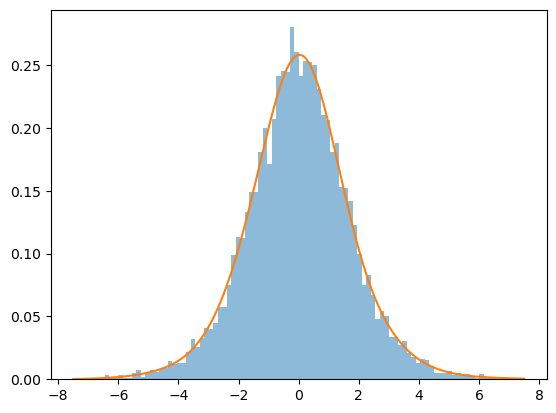

In [7]:
plt.hist(x_obs, bins=100, range=(-7.5, 7.5), alpha=0.5, density=True);

xx = np.linspace(-7.5, 7.5, 1000)
plt.plot(xx, likelihood(xx.reshape(-1, 1), pi_best, mu_best, sigma_best))

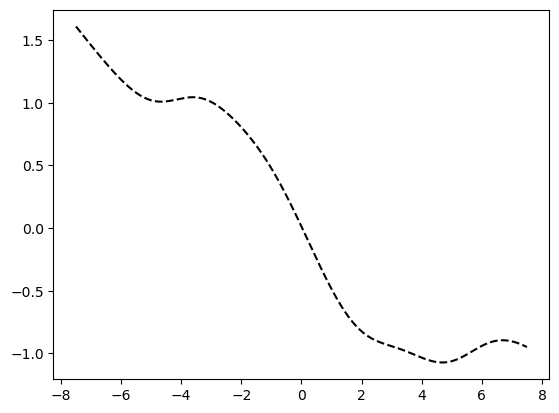

In [8]:
plt.plot(xx, d_log_likelihood(xx.reshape(-1, 1), pi_best, mu_best, sigma_best), '--k')

In [9]:
mu = x_obs + d_log_likelihood(x_obs.reshape(-1, 1), pi_best, mu_best, sigma_best).flatten()

In [10]:
np.std(x - x_obs)

1.006081541446094

In [11]:
np.std(x - mu)

Array(0.7987535, dtype=float32)

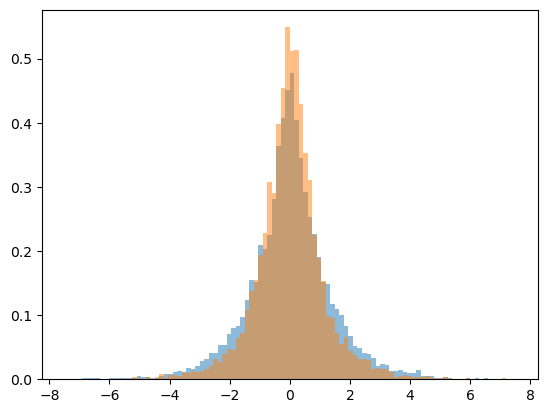

In [12]:
plt.hist(x, bins=100, range=(-7.5, 7.5), alpha=0.5, density=True);
plt.hist(mu, bins=100, range=(-7.5, 7.5), alpha=0.5, density=True);

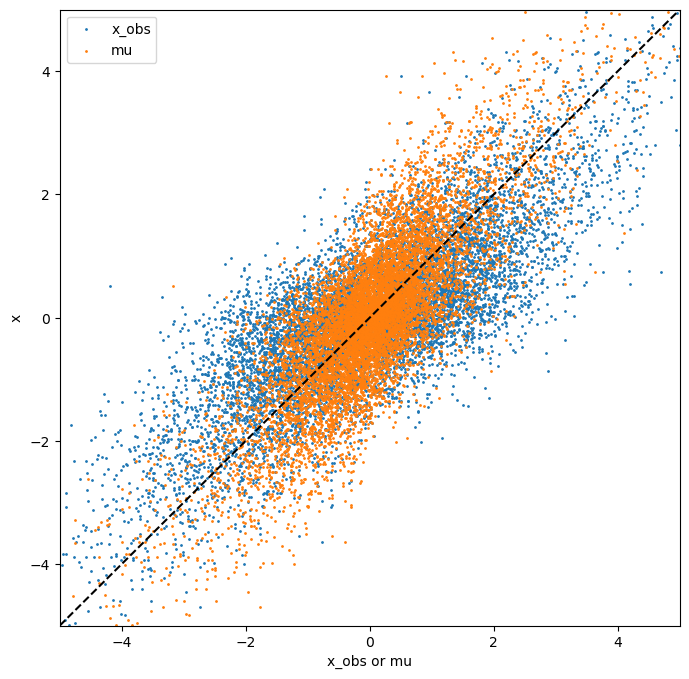

In [13]:
plt.figure(figsize=(8, 8), dpi=100)

plt.scatter(x_obs, x, label='x_obs', s=1)
plt.scatter(mu, x, label='mu', s=1)
plt.axline([0, 0], [1, 1], linestyle='--', color='k')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.xlabel('x_obs or mu')
plt.ylabel('x')

plt.legend()

## Heteroscedasticity Case

In [14]:
x = np.random.laplace(size=10000)
x_err = np.random.uniform(0.8, 1.2, size=10000)
x_obs = x + np.random.normal(scale=x_err)

In [15]:
pi_best, mu_best, sigma_best = train_em_jax(x_obs.reshape(-1, 1), 11)

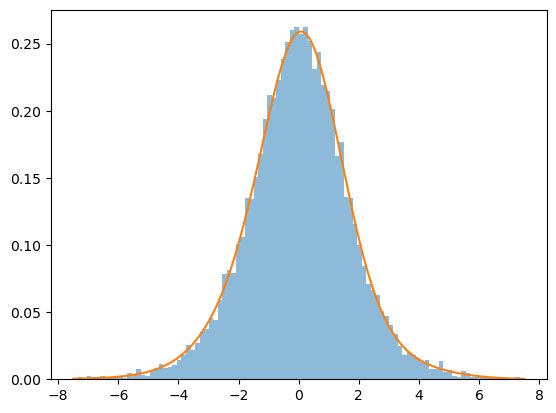

In [16]:
plt.hist(x_obs, bins=100, range=(-7.5, 7.5), alpha=0.5, density=True);

xx = np.linspace(-7.5, 7.5, 1000)
plt.plot(xx, likelihood(xx.reshape(-1, 1), pi_best, mu_best, sigma_best))

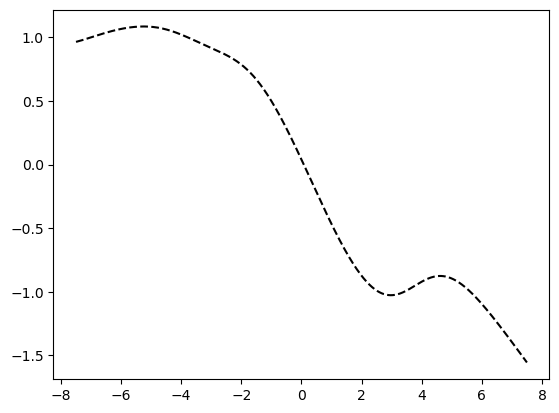

In [17]:
plt.plot(xx, d_log_likelihood(xx.reshape(-1, 1), pi_best, mu_best, sigma_best), '--k')

In [18]:
mu = x_obs + d_log_likelihood(x_obs.reshape(-1, 1), pi_best, mu_best, sigma_best).flatten() * x_err**2

In [19]:
np.std(x - x_obs)

1.012805099423642

In [20]:
np.std(x - mu)

Array(0.80053276, dtype=float32)

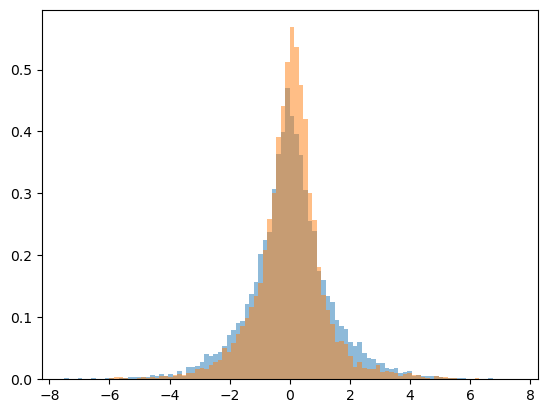

In [21]:
plt.hist(x, bins=100, range=(-7.5, 7.5), alpha=0.5, density=True);
plt.hist(mu, bins=100, range=(-7.5, 7.5), alpha=0.5, density=True);

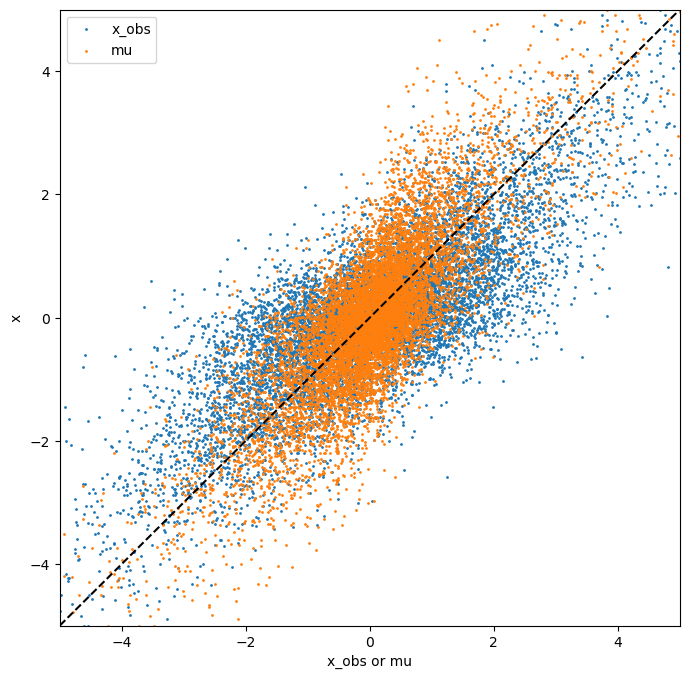

In [22]:
plt.figure(figsize=(8, 8), dpi=100)

plt.scatter(x_obs, x, label='x_obs', s=1)
plt.scatter(mu, x, label='mu', s=1)
plt.axline([0, 0], [1, 1], linestyle='--', color='k')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.xlabel('x_obs or mu')
plt.ylabel('x')

plt.legend()

## Heteroscedasticity related case

In [23]:
x = np.random.laplace(size=10000)
x_err = np.random.uniform(np.abs(x)/4 + 0.1, np.abs(x)/4 + 0.3, size=10000)
x_obs = x + np.random.normal(scale=x_err)

In [52]:
pi_best, mu_best, sigma_best = train_em_jax(jnp.c_[x_obs, 1/x_err**2], 31)

In [53]:
XX, YY = np.meshgrid(np.linspace(-7.5, 7.5, 100), np.linspace(0, 100, 100))

In [54]:
Z = likelihood(jnp.c_[XX.flatten(), YY.flatten()], pi_best, mu_best, sigma_best)
Z = Z.reshape(XX.shape)

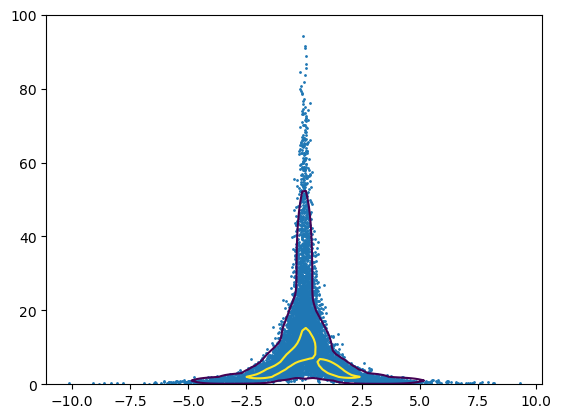

In [55]:
plt.scatter(x_obs, 1/x_err**2, s=1)
plt.contour(XX, YY, Z, levels=[0.0023825002368539554, 0.020135756824165615])

In [56]:
mu = x_obs + d_log_likelihood(jnp.c_[x_obs, 1/x_err**2], pi_best, mu_best, sigma_best)[:, 0] * x_err**2

In [57]:
np.std(x - x_obs)

0.5173360401999716

In [58]:
np.std(x - mu)

Array(0.3440463, dtype=float32)

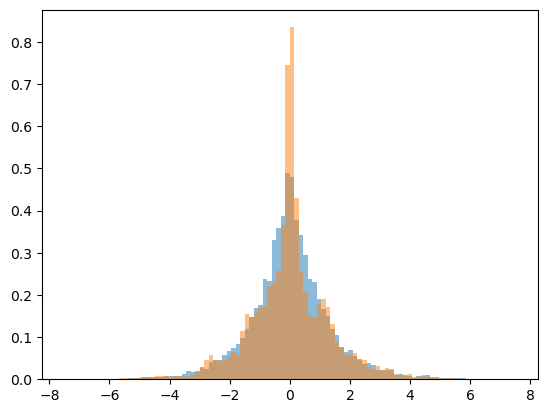

In [59]:
plt.hist(x, bins=100, range=(-7.5, 7.5), alpha=0.5, density=True);
plt.hist(mu, bins=100, range=(-7.5, 7.5), alpha=0.5, density=True);

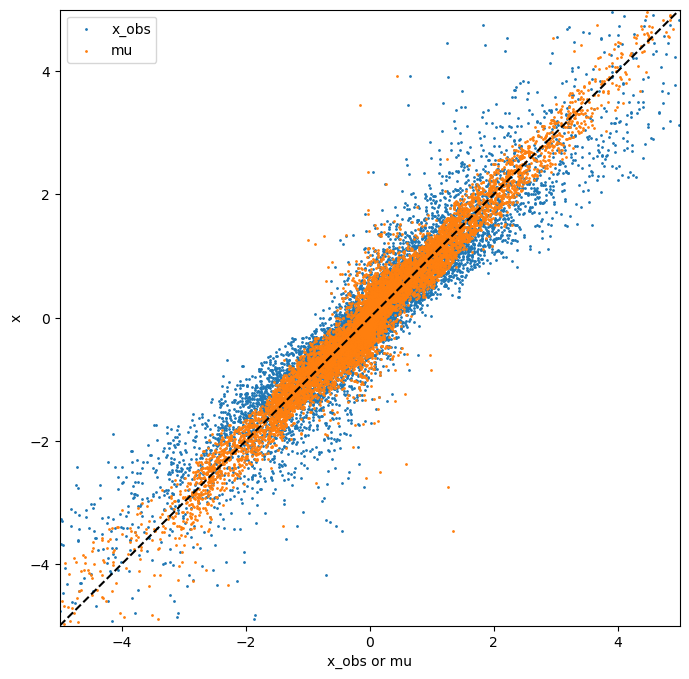

In [60]:
plt.figure(figsize=(8, 8), dpi=100)

plt.scatter(x_obs, x, label='x_obs', s=1)
plt.scatter(mu, x, label='mu', s=1)
plt.axline([0, 0], [1, 1], linestyle='--', color='k')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.xlabel('x_obs or mu')
plt.ylabel('x')

plt.legend()